In [1]:
from fuzzynumber import  *
from dbpso import DBPSO
from bees_algorithm import BeesAlgorithm

In [2]:
def hexagonalFunction(x):
    a0 = 1
    a1 = 0.75
    a2 = 0.25
    if x>a0 or x<0:
        return 0
    elif a0 >= x > a1:
        return 2-2*x
    elif a1 >= x >= a2:
        return 1.25-x
    else:
        return 1
    
P = 550
S = 50
H = 50
beta = 0.05
C = 7
def minimizingFunction(space, D=300):
    t = space[0]
    return S*D/(t*P) + (1 + beta)*C*D + ((H*t)/2)*((1+beta)*(P*(1-beta)-D)+(P-D)*beta**2)

D = LRFN(hexagonalFunction, hexagonalFunction, 300, 20, 60)


Optimal production time is 0.0467119597199466 yrs and Defuzzified Total Cost Per Unit Time is 3184.6345031575574
Production Lot Size is 25.69157784597063 with a cycle length of 0.08254915743045332 yrs
For a Hexagonal Fuzzy Demand rate given by LRFN <center=300, alpha=20, beta=60>


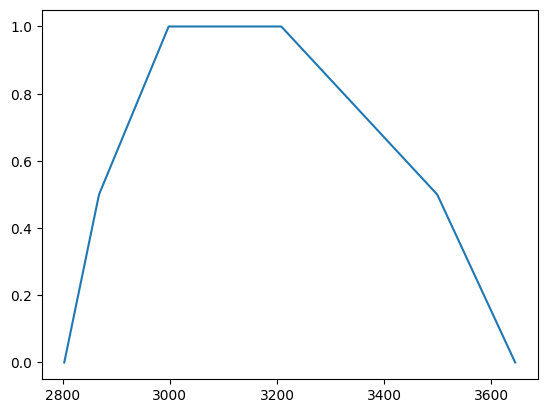

In [3]:
def func(space):
    global D
    itff = minimizingFunction(space, D)
    return itff.defuzz()

solution = DBPSO(func, Maxgen=100, N = 100, dim = 1, minx = [0.01], maxx = [3])
sol = solution.solve()
t = sol[0][0]
TC = minimizingFunction([t], D)
TC.plot()
print('''Optimal production time is {} yrs and Defuzzified Total Cost Per Unit Time is {}
Production Lot Size is {} with a cycle length of {} yrs
For a Hexagonal Fuzzy Demand rate given by {}'''.format(t, TC.defuzz(), t*P, (t*P/D).defuzz(), D))

Optimal production time is 0.07245134472413337 yrs and Defuzzified Total Cost Per Unit Time is 3107.2122784549083
Production Lot Size is 39.84823959827335 with a cycle length of 0.12803567860430948 yrs
For a Hexagonal Fuzzy Demand rate given by LRFN <center=300, alpha=20, beta=60>


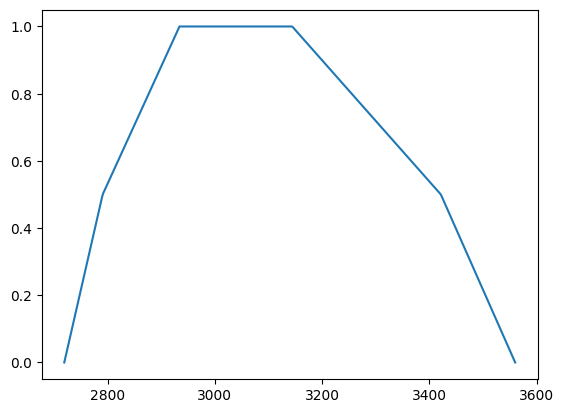

In [4]:
def func(space):
    global D
    itff = minimizingFunction(space, D)
    return -(itff.defuzz())

searchBoundaries = ([0.01], [3])
alg = BeesAlgorithm(func, searchBoundaries[0], searchBoundaries[1])
alg.performFullOptimisation(max_iteration=1000)
best = alg.best_solution
t = best.values[0]
TC = minimizingFunction([t], D)
TC.plot()
print('''Optimal production time is {} yrs and Defuzzified Total Cost Per Unit Time is {}
Production Lot Size is {} with a cycle length of {} yrs
For a Hexagonal Fuzzy Demand rate given by {}'''.format(t, TC.defuzz(), t*P, (t*P/D).defuzz(), D))

In [5]:
import pygad

Optimal production time is 0.07859724748455149 yrs and Defuzzified Total Cost Per Unit Time is 3109.8330549048715
Production Lot Size is 43.22848611650332 with a cycle length of 0.13889668930828497 yrs
For a Hexagonal Fuzzy Demand rate given by LRFN <center=300, alpha=20, beta=60>


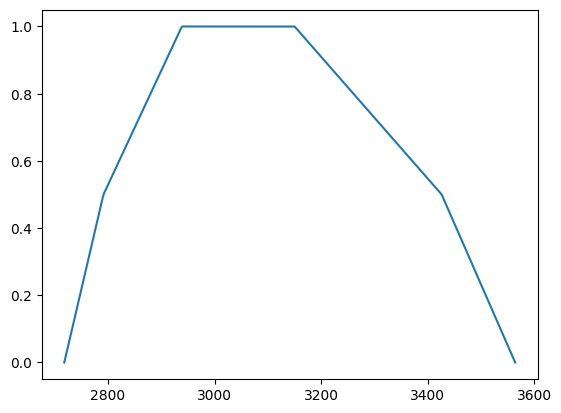

In [8]:
def func(instance, space, index):
    global D
    itff = minimizingFunction(space, D)
    return -(itff.defuzz())

solver = pygad.GA(num_generations=5000, num_parents_mating=5, fitness_func=func, init_range_low=0.01, init_range_high=3, num_genes=1, sol_per_pop=100, mutation_type=None)
solver.run()
solution, solution_fitness, solution_idx = solver.best_solution()
t = solution[0]
TC = minimizingFunction([t], D)
TC.plot()
print('''Optimal production time is {} yrs and Defuzzified Total Cost Per Unit Time is {}
Production Lot Size is {} with a cycle length of {} yrs
For a Hexagonal Fuzzy Demand rate given by {}'''.format(t, TC.defuzz(), t*P, (t*P/D).defuzz(), D))